In [134]:
import tensorflow as tf
import numpy as np
import opendatasets as od
import os
import pandas as pd
import matplotlib.pyplot as plt

#tf.debugging.set_log_device_placement(True)

os.getcwd()

'd:\\Work\\04Script\\03DataScience\\Minst Fashion'

In [135]:
# import tensorflow as tf
# from tensorflow.python.keras import backend as K

# # adjust values to your needs
# config = tf.compat.v1.ConfigProto(device_count = {'GPU': 0 , 'CPU': 16} )
# sess = tf.compat.v1.Session(config=config) 
# K.set_session(sess)

In [136]:
tf.config.list_physical_devices('GPU')
#tf.device('/GPU:0')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [137]:
tf.__version__

'2.10.1'

In [138]:
dataset_url = 'https://www.kaggle.com/datasets/zalando-research/fashionmnist/download?datasetVersionNumber=4'
od.download_kaggle_dataset(dataset_url, data_dir=os.getcwd())

Skipping, found downloaded files in "d:\Work\04Script\03DataScience\Minst Fashion\fashionmnist" (use force=True to force download)


In [139]:
train_df = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('fashionmnist/fashion-mnist_test.csv')
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [140]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

print(x_train.shape, y_train.shape)
print(x_validate.shape, y_validate.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


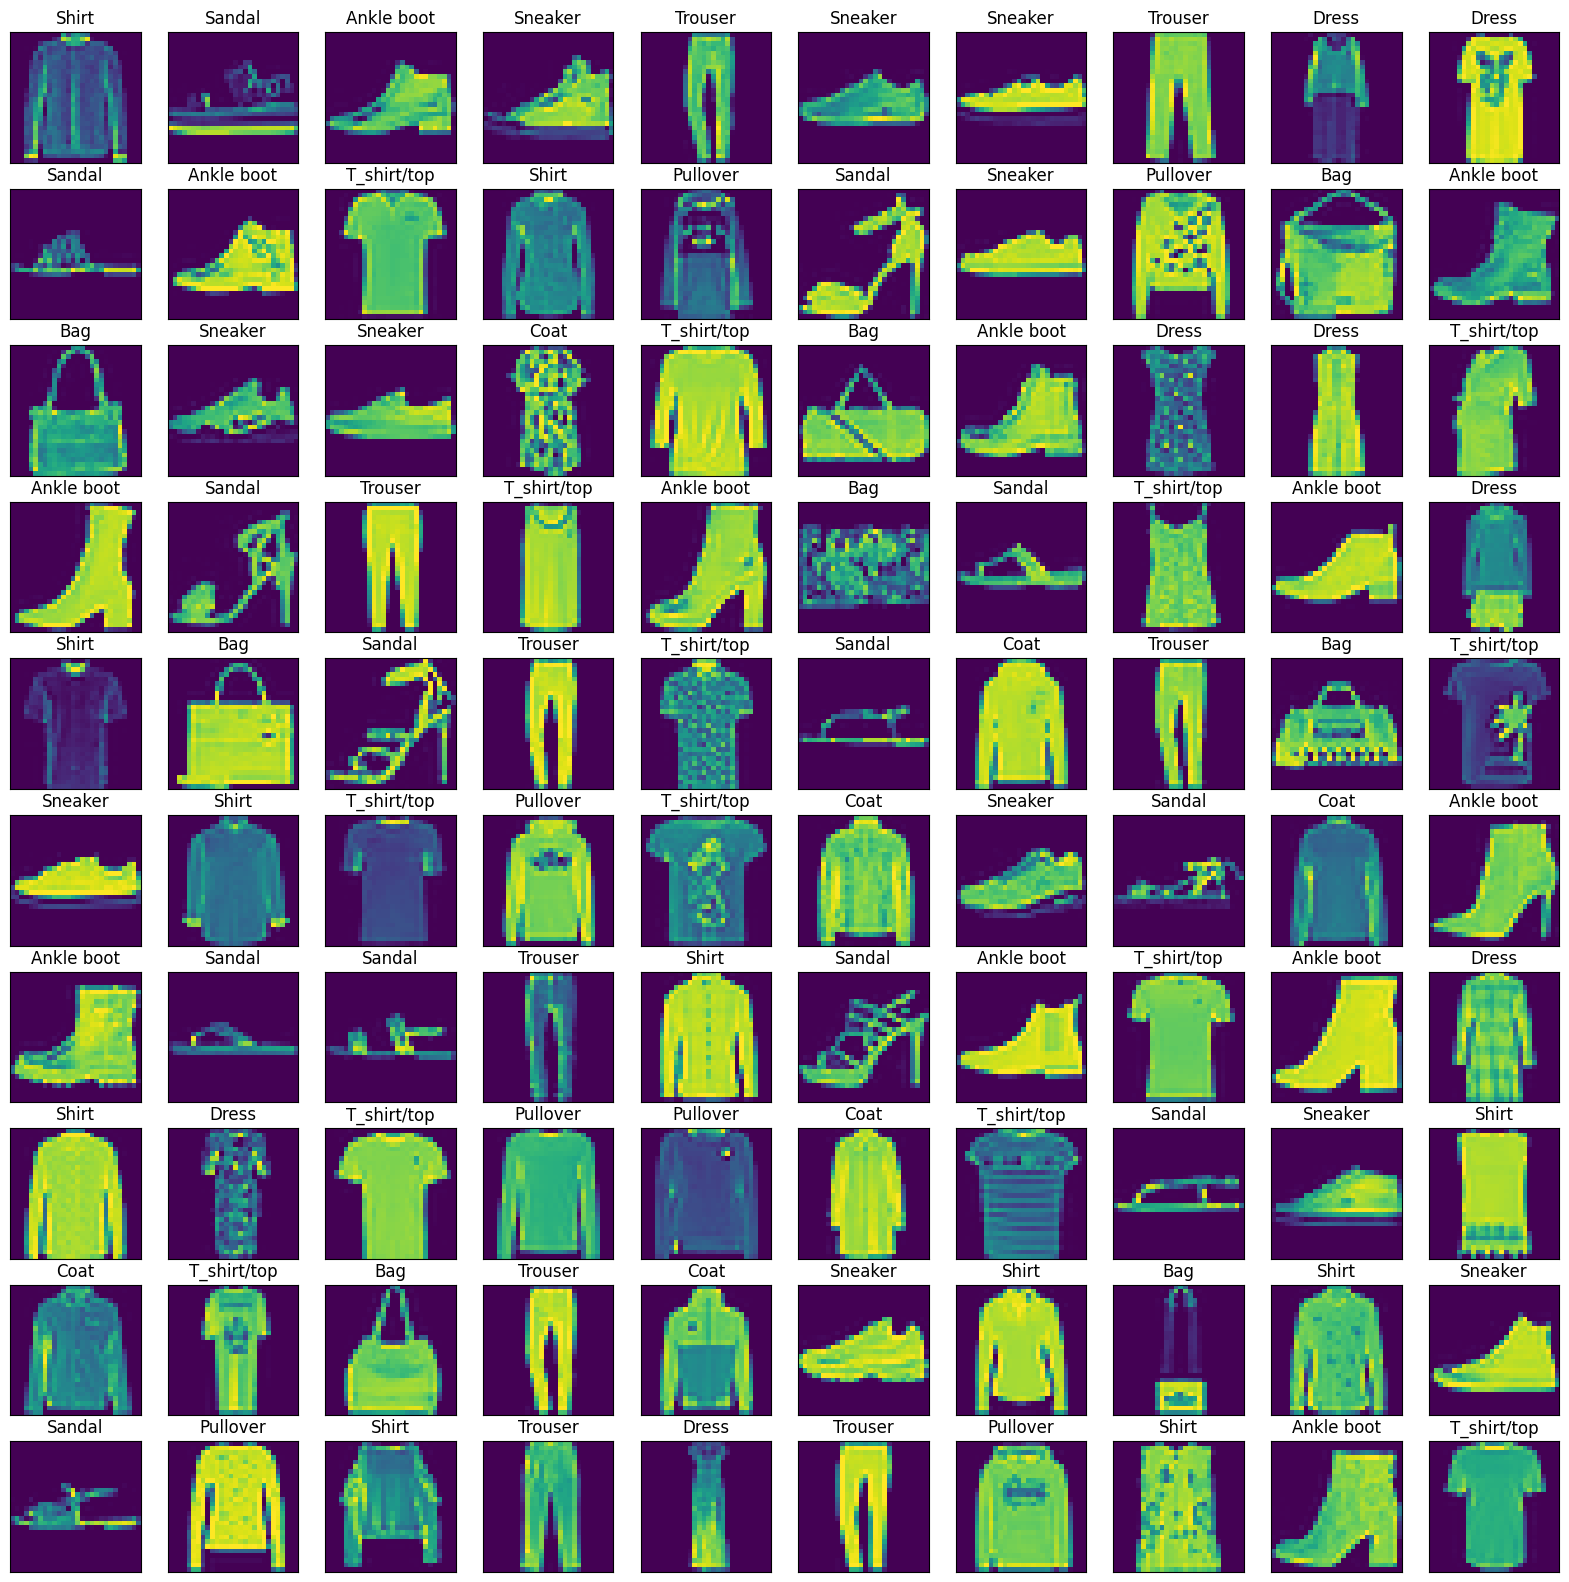

In [142]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
m = 10
n = 10

plt.figure(figsize=(20, 20))
for i in range(m*n):
    plt.subplot(m, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [144]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [145]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [146]:
history = model.fit(x_train, y_train,batch_size=4000, epochs=40,validation_data= (x_validate,y_validate), verbose=2, use_multiprocessing=True)

Epoch 1/40
12/12 - 0s - loss: 1.4467 - accuracy: 0.5544 - val_loss: 0.9088 - val_accuracy: 0.7025 - 387ms/epoch - 32ms/step
Epoch 2/40
12/12 - 0s - loss: 0.7836 - accuracy: 0.7347 - val_loss: 0.6841 - val_accuracy: 0.7633 - 97ms/epoch - 8ms/step
Epoch 3/40
12/12 - 0s - loss: 0.6402 - accuracy: 0.7832 - val_loss: 0.5975 - val_accuracy: 0.7915 - 97ms/epoch - 8ms/step
Epoch 4/40
12/12 - 0s - loss: 0.5728 - accuracy: 0.8057 - val_loss: 0.5521 - val_accuracy: 0.8106 - 97ms/epoch - 8ms/step
Epoch 5/40
12/12 - 0s - loss: 0.5331 - accuracy: 0.8198 - val_loss: 0.5233 - val_accuracy: 0.8202 - 98ms/epoch - 8ms/step
Epoch 6/40
12/12 - 0s - loss: 0.5078 - accuracy: 0.8289 - val_loss: 0.4987 - val_accuracy: 0.8290 - 98ms/epoch - 8ms/step
Epoch 7/40
12/12 - 0s - loss: 0.4866 - accuracy: 0.8347 - val_loss: 0.4802 - val_accuracy: 0.8372 - 101ms/epoch - 8ms/step
Epoch 8/40
12/12 - 0s - loss: 0.4695 - accuracy: 0.8403 - val_loss: 0.4658 - val_accuracy: 0.8432 - 97ms/epoch - 8ms/step
Epoch 9/40
12/12 - 0s

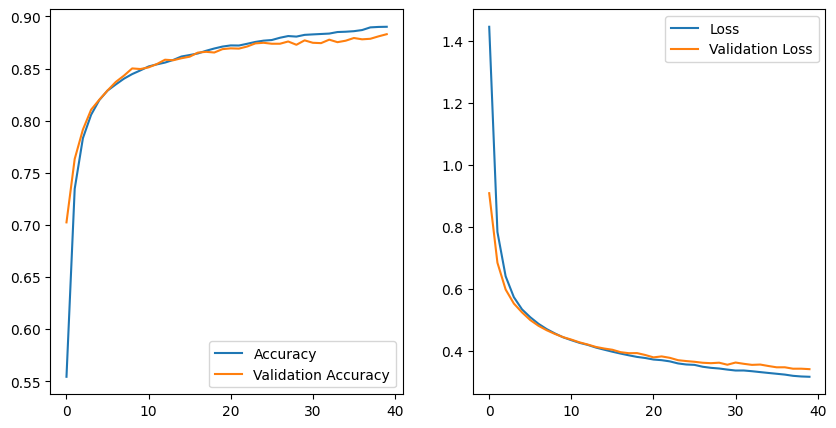

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plt.figure(figsize=(30,30))
# for i in range(1,10):
#     plt.subplot(5,2,i)

In [154]:
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [155]:
score = model.evaluate(x_test, y_test)

print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8793
Test Loss : 0.3461
Test Accuracy : 0.8793


In [158]:
predicted_classes

array([[ 11.187994  ,  -3.6120152 ,   3.577728  , ..., -16.635235  ,
          1.1780356 , -19.801424  ],
       [  0.64076537,  11.322483  ,  -1.0602587 , ...,  -6.7245445 ,
         -1.4165516 ,  -7.678216  ],
       [  0.8993271 ,  -0.14189401,   3.6571856 , ...,  -6.2903156 ,
         -0.9342576 ,  -5.39157   ],
       ...,
       [ -6.9253716 ,  -7.2759943 ,  -2.5232415 , ...,  -8.426901  ,
         10.651086  , -14.012153  ],
       [  4.554216  ,  -6.8758874 ,   1.5948316 , ..., -14.308502  ,
          8.013632  , -11.95511   ],
       [  2.9475446 ,   7.062546  ,   5.6360474 , ..., -18.684416  ,
         -0.5075451 , -16.873003  ]], dtype=float32)

313/313 [==============================] - 0s 1ms/step


TypeError: unsupported format string passed to numpy.ndarray.__format__

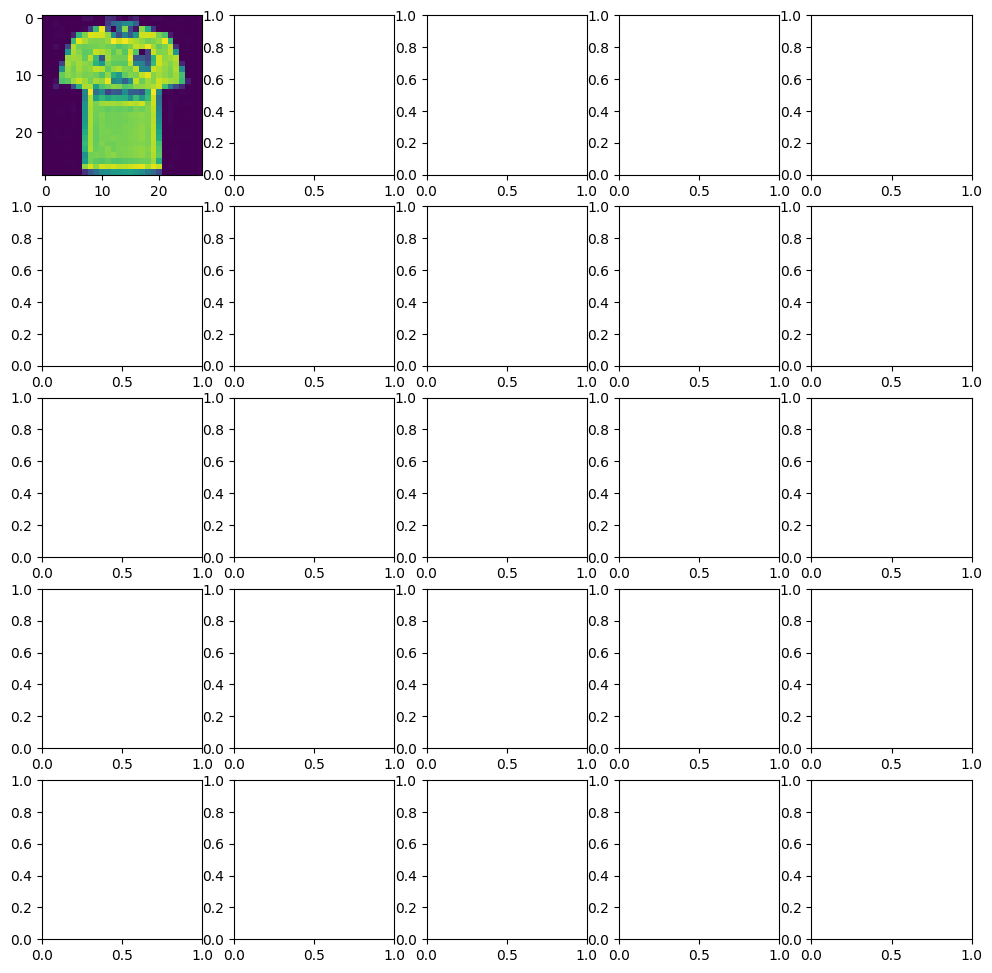

In [157]:
predicted_classes = model.predict(x_test)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)